In [4]:
pip install matplotlib


Accuracy: 0.7932960893854749


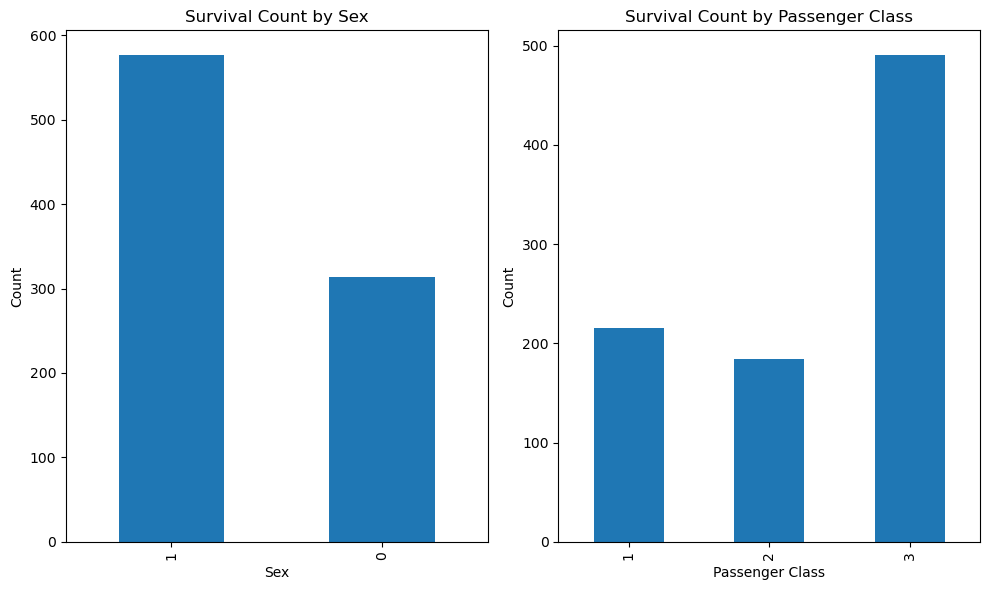

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('titanic_dataset.csv')  # Make sure to provide the correct file path

# Preprocessing
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

# Split the data into features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Data Visualization
plt.figure(figsize=(10, 6))

# Plot survival count by sex
plt.subplot(1, 2, 1)
data['Sex'].value_counts().plot(kind='bar')
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

# Plot survival count by passenger class
plt.subplot(1, 2, 2)
data['Pclass'].value_counts().sort_index().plot(kind='bar')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()
